
# Hierarchical clustering

Hierarchical clustering, also referred to as hierarchical cluster analysis, is a method that categorizes similar entities into groups known as clusters. This process results in a collection of clusters, with each being unique from the others, and the entities within each cluster sharing a high degree of similarity.

## About the dataset

The EastWestAirlines file comprises details about passengers enrolled in an airline's frequent flyer program. It includes data on each passenger's mileage accumulation and expenditure over the past year. The objective is to categorize passengers into distinct clusters based on shared traits to tailor various mileage offer types to different passenger segments.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster

# Load the dataset
real_estate_data = pd.read_csv('/content/real-estate-sales-730-days-1.csv')

# Selecting relevant features for clustering and preprocessing
features_for_clustering = real_estate_data.select_dtypes(include=['float64', 'int64']).drop(['index', 'PropertyID', 'xrCompositeLandUseID', 'xrBuildingTypeID', 'xrPrimaryNeighborhoodID', 'xrSalesValidityID', 'xrDeedID'], axis=1)
data_scaled_real_estate = StandardScaler().fit_transform(features_for_clustering.fillna(0))

# Performing hierarchical clustering
linked_real_estate = linkage(data_scaled_real_estate, method='ward')

# Assigning clusters (assuming 5 clusters for this example)
n_clusters_real_estate = 5
clusters_real_estate = fcluster(linked_real_estate, n_clusters_real_estate, criterion='maxclust')

# Adding cluster labels to the dataset
real_estate_data_with_clusters = real_estate_data.copy()
real_estate_data_with_clusters['Cluster'] = clusters_real_estate

# Analyzing the characteristics of each cluster
cluster_characteristics_real_estate = real_estate_data_with_clusters.groupby('Cluster').mean()

# Displaying the analysis
print(cluster_characteristics_real_estate)


               index    PropertyID  xrCompositeLandUseID  xrBuildingTypeID  \
Cluster                                                                      
1        2268.500000  14354.000000             53.000000         50.500000   
2        2174.000000  12889.333333            161.000000         38.666667   
3        1911.625000  11573.125000             60.500000         33.375000   
4        2223.542636  13626.397933            131.555556         23.349741   
5        2380.826298  14623.276355            122.180392         13.998843   

         LocationStartNumber  xrPrimaryNeighborhoodID        LandSF  \
Cluster                                                               
1                 755.000000               120.000000  9.260800e+04   
2                 267.333333               109.000000  1.489547e+06   
3                 162.500000               162.000000  1.164109e+05   
4                1231.237726               166.390181  1.249490e+04   
5                 124.47115

<ipython-input-1-680d2a04c4c0>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_characteristics_real_estate = real_estate_data_with_clusters.groupby('Cluster').mean()


## Let's proceed with this analysis. ​​

The analysis of the average values of different features for each of the five clusters in the real estate dataset reveals distinct characteristics:

Cluster 1:

Exceptionally high sale prices and total appraised values.
Very large properties in terms of land and finished area.
Properties in this cluster represent extremely high-value transactions.
Cluster 2:

Extremely large land sizes with relatively large total finished areas.
Lower sale prices compared to other clusters, possibly indicating undeveloped land or properties in less developed areas.
Cluster 3:

Large finished areas and relatively large land sizes.
High number of living units, suggesting multi-family properties or commercial buildings.
High sale prices and appraised values.
Cluster 4:

Moderate land sizes and finished areas.
A higher number of living units than average, possibly indicating small multi-family properties or townhouses.
Moderate sale prices and appraised values.
Cluster 5:

Smaller land sizes and finished areas.
A higher number of living units than Cluster 4, possibly indicating densely populated residential areas or apartments.
Higher sale prices than Cluster 4, suggesting properties in more desirable locations or with higher-quality amenities.

## Interpretation of the Box Plots for the Dataset

For each feature, we created box plots for the different clusters. Here's how to interpret these plots:

Height of the Box (IQR): A taller box indicates a larger variation within that cluster for the particular feature. A shorter box indicates that the data points are more tightly grouped.

Position of the Median Line: If the median line is closer to the top of the box, it indicates a skew towards lower values in that cluster, and vice versa.

Whiskers: Longer whiskers show a wider range of values within that cluster. If whiskers are particularly short, it means most of the data points are concentrated near the median.

Outliers (Individual Points beyond Whiskers): These points are significantly higher or lower than the rest of the data in that cluster, indicating exceptional cases.

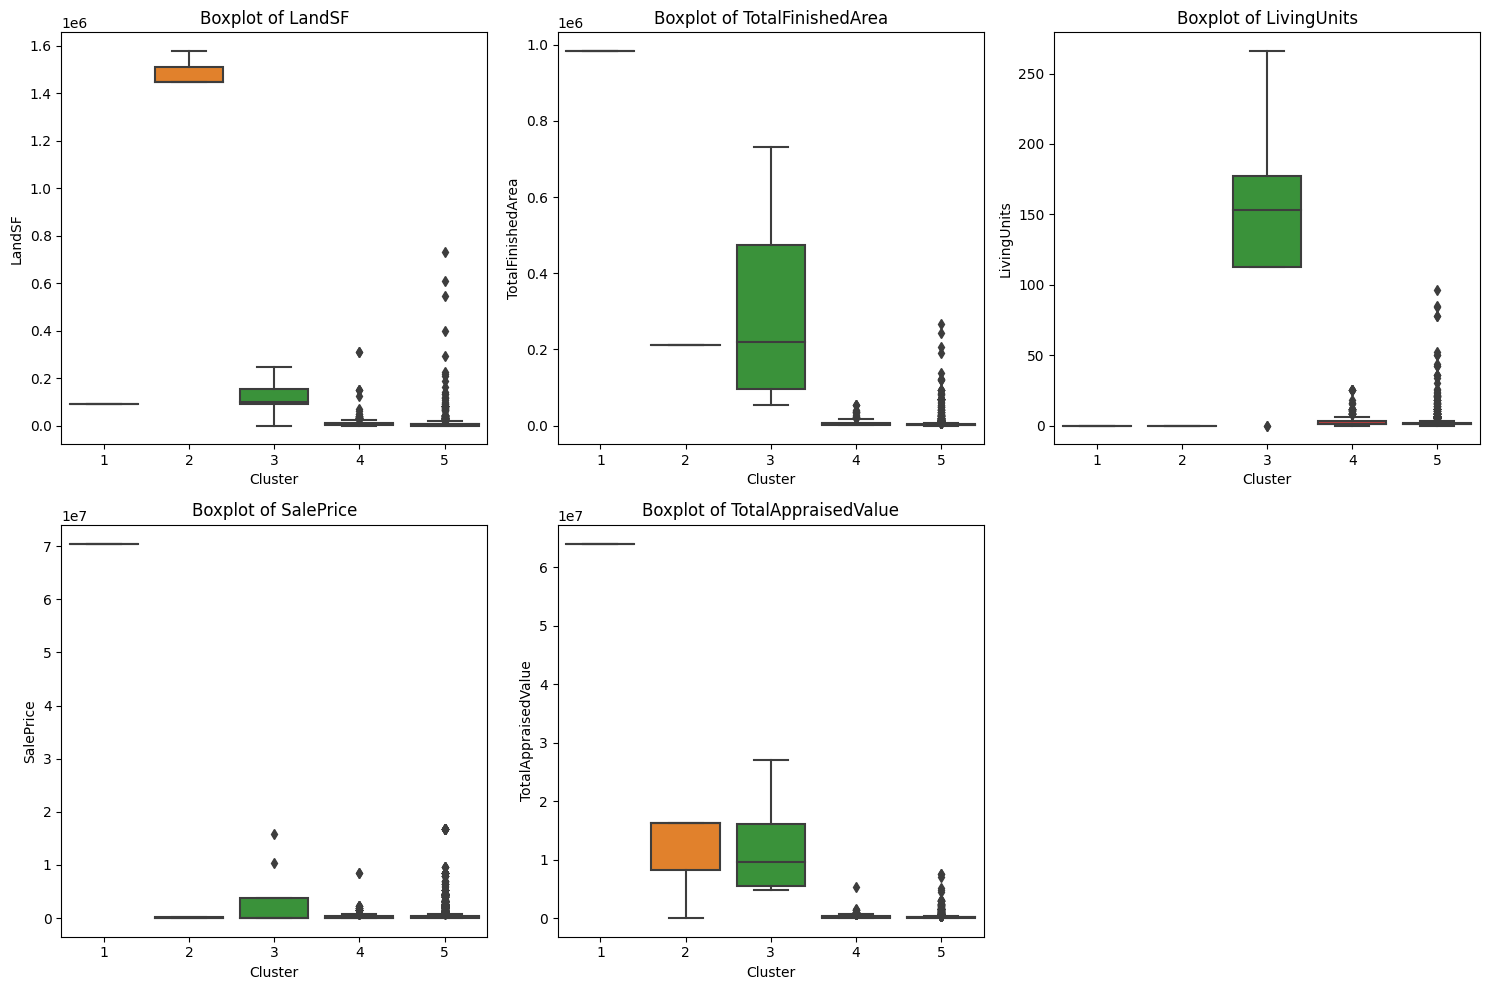

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting a few key features for boxplot visualization
features_to_visualize = ['LandSF', 'TotalFinishedArea', 'LivingUnits', 'SalePrice', 'TotalAppraisedValue']

# Creating boxplots for each feature across clusters
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_visualize, 1):
    plt.subplot(2, 3, i)  # Adjust the layout based on the number of features
    sns.boxplot(x='Cluster', y=feature, data=real_estate_data_with_clusters)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


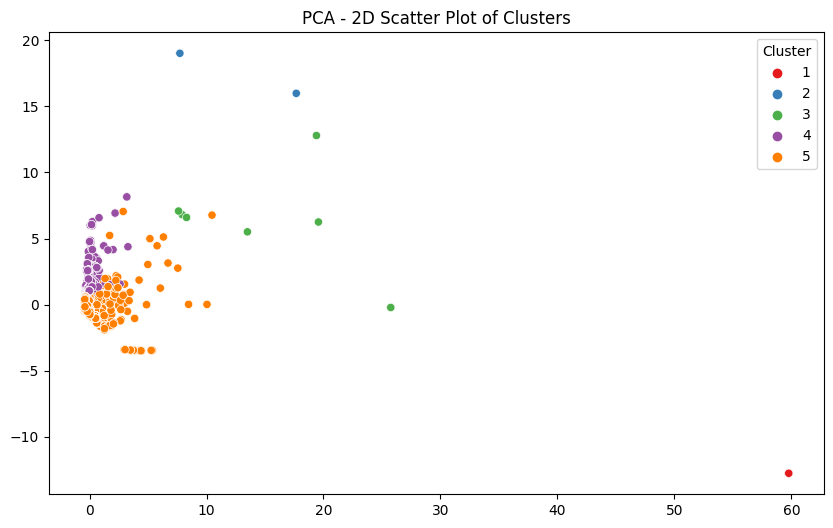

In [4]:
from sklearn.decomposition import PCA

# Reducing the data to 2 dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled_real_estate)

# Scatter plot of the reduced data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], hue=real_estate_data_with_clusters['Cluster'], palette='Set1')
plt.title('PCA - 2D Scatter Plot of Clusters')
plt.show()


This is a scatter plot of the data reduced to two dimensions using PCA, with points colored according to their assigned cluster. This visualization helps to see how distinct the clusters are in a reduced-dimensional space.